# 1) Title, Name and References

# 2) Library import and data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv("dataset/Lab02_prepared.csv")

In [3]:
df.head(5)
df.shape

(1883, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1883 non-null   int64  
 1   InstRating                1883 non-null   float64
 2   Lectures                  1883 non-null   float64
 3   Duration                  1883 non-null   float64
 4   AvgRating                 1883 non-null   float64
 5   LastUpdated               1883 non-null   float64
 6   Fee                       1883 non-null   float64
 7   Discount                  1883 non-null   float64
 8   cbrt_NumberRating         1883 non-null   float64
 9   cbrt_Enrollment           1883 non-null   float64
 10  cbrt_Student              1883 non-null   float64
 11  cbrt_Review               1883 non-null   float64
 12  cat_design                1883 non-null   int64  
 13  cat_it_software           1883 non-null   int64  
 14  cat_life

In [5]:
df.shape

(1883, 18)

In [6]:
df.dtypes

Unnamed: 0                    int64
InstRating                  float64
Lectures                    float64
Duration                    float64
AvgRating                   float64
LastUpdated                 float64
Fee                         float64
Discount                    float64
cbrt_NumberRating           float64
cbrt_Enrollment             float64
cbrt_Student                float64
cbrt_Review                 float64
cat_design                    int64
cat_it_software               int64
cat_lifestyle                 int64
cat_marketing                 int64
cat_personal_development      int64
cat_programming               int64
dtype: object

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)   ## dropping course category as we have dummy value

In [8]:
df.head(5)

InstRating  Lectures   Duration  AvgRating  LastUpdated    Fee  Discount  \
0         4.5     286.0   9.800000        4.6          3.0  19.99      88.0   
1         4.2      66.0   4.966667        4.2          3.0  16.99      88.0   
2         4.5     251.0  93.150000        4.4          5.0  17.99      89.0   
3         4.7      26.0   2.050000        4.7          3.0  16.99      80.0   
4         4.4      82.0  11.066667        4.4          6.0  16.99      83.0   

   cbrt_NumberRating  cbrt_Enrollment  cbrt_Student  cbrt_Review  cat_design  \
0          27.951020        48.974581     74.041978    44.791629           0   
1          11.416535        20.853094     31.853168    17.819177           0   
2          19.004616        31.409753     72.232850    36.717597           0   
3          16.913051        25.146869     35.740678    24.546490           0   
4           8.946181        17.940130     41.425278    25.027703           0   

   cat_it_software  cat_lifestyle  cat_marketing  cat_personal_development  \
0                0              0              0                         0   
1                0              0              0                         0   
2                1              0              0                         0   
3                1              0              0                         0   
4                0              0              0                         1   

   cat_programming  
0                0  
1                1  
2                0  
3                0  
4                0

In [9]:
df.shape

(1883, 17)

In [10]:
df.isna().sum()

InstRating                  0
Lectures                    0
Duration                    0
AvgRating                   0
LastUpdated                 0
Fee                         0
Discount                    0
cbrt_NumberRating           0
cbrt_Enrollment             0
cbrt_Student                0
cbrt_Review                 0
cat_design                  0
cat_it_software             0
cat_lifestyle               0
cat_marketing               0
cat_personal_development    0
cat_programming             0
dtype: int64

In [11]:
df.dtypes

InstRating                  float64
Lectures                    float64
Duration                    float64
AvgRating                   float64
LastUpdated                 float64
Fee                         float64
Discount                    float64
cbrt_NumberRating           float64
cbrt_Enrollment             float64
cbrt_Student                float64
cbrt_Review                 float64
cat_design                    int64
cat_it_software               int64
cat_lifestyle                 int64
cat_marketing                 int64
cat_personal_development      int64
cat_programming               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   InstRating                1883 non-null   float64
 1   Lectures                  1883 non-null   float64
 2   Duration                  1883 non-null   float64
 3   AvgRating                 1883 non-null   float64
 4   LastUpdated               1883 non-null   float64
 5   Fee                       1883 non-null   float64
 6   Discount                  1883 non-null   float64
 7   cbrt_NumberRating         1883 non-null   float64
 8   cbrt_Enrollment           1883 non-null   float64
 9   cbrt_Student              1883 non-null   float64
 10  cbrt_Review               1883 non-null   float64
 11  cat_design                1883 non-null   int64  
 12  cat_it_software           1883 non-null   int64  
 13  cat_lifestyle             1883 non-null   int64  
 14  cat_mark

In [13]:
df.isnull().sum()

InstRating                  0
Lectures                    0
Duration                    0
AvgRating                   0
LastUpdated                 0
Fee                         0
Discount                    0
cbrt_NumberRating           0
cbrt_Enrollment             0
cbrt_Student                0
cbrt_Review                 0
cat_design                  0
cat_it_software             0
cat_lifestyle               0
cat_marketing               0
cat_personal_development    0
cat_programming             0
dtype: int64

In [14]:
df.duplicated().sum()

2

In [15]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [InstRating, Lectures, Duration, AvgRating, LastUpdated, Fee, Discount, cbrt_NumberRating, cbrt_Enrollment, cbrt_Student, cbrt_Review, cat_design, cat_it_software, cat_lifestyle, cat_marketing, cat_personal_development, cat_programming]
Index: []

In [16]:
df.duplicated().sum()

0

# 3) Exploratory Data Analysis

## a) print sumamry statistics

In [17]:
df.describe()

InstRating     Lectures     Duration    AvgRating  LastUpdated  \
count  1881.000000  1881.000000  1881.000000  1881.000000  1881.000000   
mean      4.430835   105.194046    12.155192     4.423658     3.757044   
std       0.187894    99.748711    13.457696     0.235355     1.293595   
min       3.800000     5.000000     1.000000     2.700000     3.000000   
25%       4.300000    44.000000     4.416667     4.300000     3.000000   
50%       4.500000    74.000000     7.883333     4.500000     3.000000   
75%       4.600000   125.000000    14.433333     4.600000     4.000000   
max       4.800000   699.000000   164.000000     4.900000    12.000000   

               Fee     Discount  cbrt_NumberRating  cbrt_Enrollment  \
count  1881.000000  1881.000000        1881.000000      1881.000000   
mean     23.196155    78.558214          12.612513        22.858254   
std      20.082883    16.461720           5.882677        10.069252   
min      15.712500    30.000000           2.571282         3.301927   
25%      16.990000    74.000000           8.549880        15.654031   
50%      18.487500    86.000000          11.281967        21.072313   
75%      21.990000    89.000000          15.123426        27.464306   
max     199.990000    92.000000          39.466029        59.825512   

       cbrt_Student  cbrt_Review   cat_design  cat_it_software  cat_lifestyle  \
count   1881.000000  1881.000000  1881.000000      1881.000000    1881.000000   
mean      46.189986    26.565833     0.075492         0.232323       0.072302   
std       26.378770    16.777412     0.264253         0.422426       0.259056   
min        3.802952     3.141381     0.000000         0.000000       0.000000   
25%       25.544840    13.873001     0.000000         0.000000       0.000000   
50%       39.887601    22.521297     0.000000         0.000000       0.000000   
75%       61.453310    34.811229     0.000000         0.000000       0.000000   
max      129.445070    86.756354     1.000000         1.000000       1.000000   

       cat_marketing  cat_personal_development  cat_programming  
count    1881.000000               1881.000000      1881.000000  
mean        0.036683                  0.103668         0.294524  
std         0.188031                  0.304911         0.455950  
min         0.000000                  0.000000         0.000000  
25%         0.000000                  0.000000         0.000000  
50%         0.000000                  0.000000         0.000000  
75%         0.000000                  0.000000         1.000000  
max         1.000000                  1.000000         1.000000

## b) print out correlation of features

In [18]:
df.corr()

InstRating  Lectures  Duration  AvgRating  \
InstRating                  1.000000  0.033595 -0.000338   0.751144   
Lectures                    0.033595  1.000000  0.716271   0.005659   
Duration                   -0.000338  0.716271  1.000000  -0.044205   
AvgRating                   0.751144  0.005659 -0.044205   1.000000   
LastUpdated                -0.042912 -0.094410 -0.102420  -0.012734   
Fee                        -0.030007  0.004575  0.001975  -0.058158   
Discount                   -0.009145 -0.024255  0.002756   0.003372   
cbrt_NumberRating           0.349837  0.038145  0.022964   0.317827   
cbrt_Enrollment             0.340881  0.031365  0.015291   0.312933   
cbrt_Student                0.256413  0.051955  0.030454   0.183983   
cbrt_Review                 0.360384  0.050881  0.028319   0.252127   
cat_design                  0.047367 -0.048644  0.003532   0.050808   
cat_it_software            -0.125821 -0.014489 -0.031693  -0.123259   
cat_lifestyle               0.110443 -0.078579 -0.076048   0.112390   
cat_marketing              -0.032032 -0.028286 -0.027868  -0.016015   
cat_personal_development    0.035163 -0.103356 -0.111963   0.033998   
cat_programming             0.051643  0.211168  0.191812   0.029214   

                          LastUpdated       Fee  Discount  cbrt_NumberRating  \
InstRating                  -0.042912 -0.030007 -0.009145           0.349837   
Lectures                    -0.094410  0.004575 -0.024255           0.038145   
Duration                    -0.102420  0.001975  0.002756           0.022964   
AvgRating                   -0.012734 -0.058158  0.003372           0.317827   
LastUpdated                  1.000000  0.030505 -0.063868          -0.007474   
Fee                          0.030505  1.000000  0.040402          -0.023809   
Discount                    -0.063868  0.040402  1.000000           0.009650   
cbrt_NumberRating           -0.007474 -0.023809  0.009650           1.000000   
cbrt_Enrollment              0.007436 -0.021359  0.021603           0.922000   
cbrt_Student                -0.027152 -0.021406 -0.026820           0.497812   
cbrt_Review                 -0.047125 -0.025886 -0.018733           0.557824   
cat_design                  -0.024119 -0.013959 -0.010182          -0.022765   
cat_it_software             -0.042663 -0.019640 -0.044208          -0.074190   
cat_lifestyle                0.096890  0.024227 -0.005727          -0.076858   
cat_marketing               -0.000516 -0.027499 -0.013493          -0.017985   
cat_personal_development     0.128621  0.038811  0.002135           0.015482   
cat_programming             -0.095056 -0.077376 -0.017168           0.149018   

                          cbrt_Enrollment  cbrt_Student  cbrt_Review  \
InstRating                       0.340881      0.256413     0.360384   
Lectures                         0.031365      0.051955     0.050881   
Duration                         0.015291      0.030454     0.028319   
AvgRating                        0.312933      0.183983     0.252127   
LastUpdated                      0.007436     -0.027152    -0.047125   
Fee                             -0.021359     -0.021406    -0.025886   
Discount                         0.021603     -0.026820    -0.018733   
cbrt_NumberRating                0.922000      0.497812     0.557824   
cbrt_Enrollment                  1.000000      0.589657     0.590930   
cbrt_Student                     0.589657      1.000000     0.946153   
cbrt_Review                      0.590930      0.946153     1.000000   
cat_design                      -0.009682     -0.067652    -0.082999   
cat_it_software                 -0.097308     -0.032341    -0.038920   
cat_lifestyle                   -0.048295     -0.117769    -0.127141   
cat_marketing                    0.002670     -0.021468    -0.045873   
cat_personal_development         0.022070     -0.068882    -0.061276   
cat_programming                  0.143875      0.238115     0.245029   

         

<Axes: >

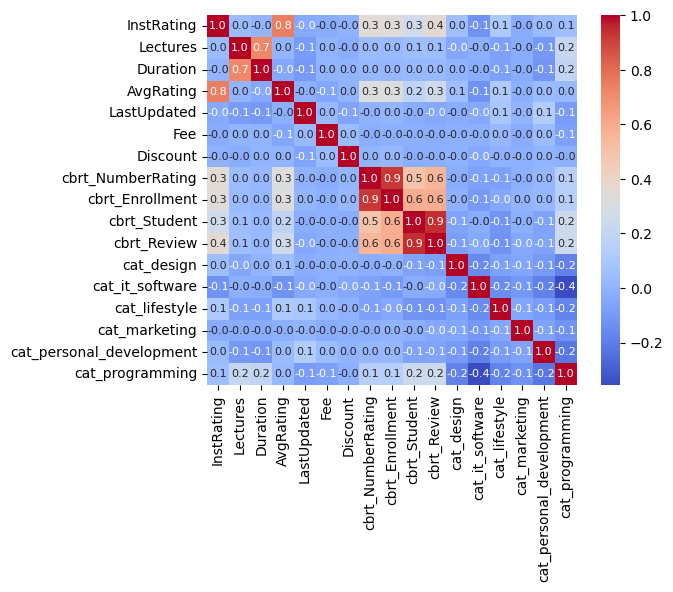

In [19]:
## Creating heatmap of correlation
sns.heatmap(df.corr(), square=True,cbar=True, annot=True, cmap='coolwarm', fmt='.1f',
            annot_kws={'size': 8},
            yticklabels=df.columns,
            xticklabels=df.columns
            )

## C) Univariate Analysis

C:\Users\Rajat\AppData\Local\Temp\ipykernel_18328\145291304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cbrt_NumberRating)


<Axes: xlabel='cbrt_NumberRating', ylabel='Density'>

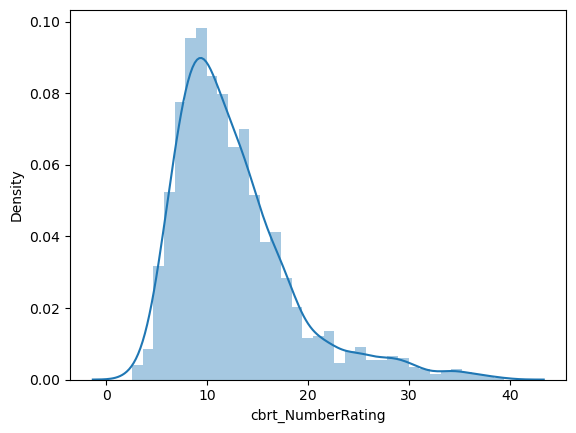

In [20]:
sns.distplot(df.cbrt_NumberRating)

### We can see that shape of data is right skewed not normalised it suggests that the distribution of values for some features is not symmetrical and may contain outliers. In such cases, it is common to apply data transformations to make the distribution more normal or to scale the features appropriately

<Axes: >

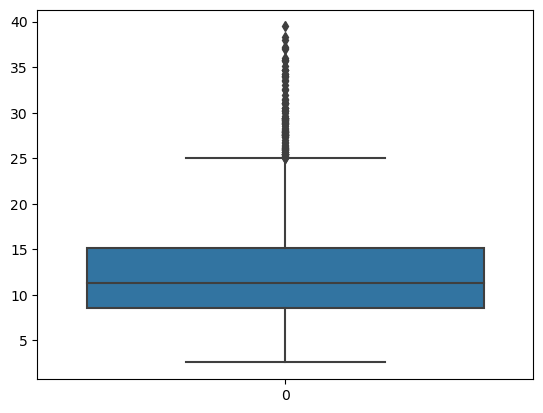

In [21]:
sns.boxplot(df.cbrt_NumberRating)   ## shape is right skewed

In [22]:
## Find the index of records where cbrt_NumberRatings > 30 and drop them. Plot its distribution again

index = df[df.cbrt_NumberRating > 30].index


In [23]:
df.drop(index, inplace=True)

C:\Users\Rajat\AppData\Local\Temp\ipykernel_18328\2499947508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.cbrt_NumberRating, kde=True)


<Axes: xlabel='cbrt_NumberRating', ylabel='Density'>

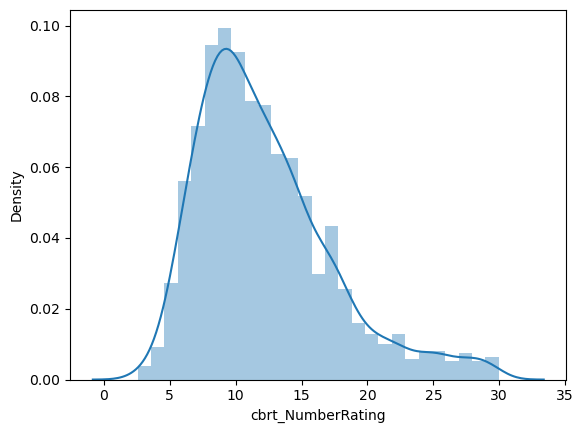

In [24]:
sns.distplot(df.cbrt_NumberRating, kde=True)

<Axes: >

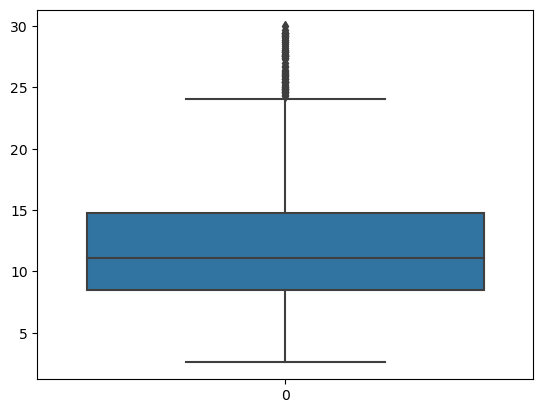

In [25]:
sns.boxplot(df.cbrt_NumberRating)

## d) Multivariate Analysis

<Axes: xlabel='cbrt_NumberRating', ylabel='cbrt_Enrollment'>

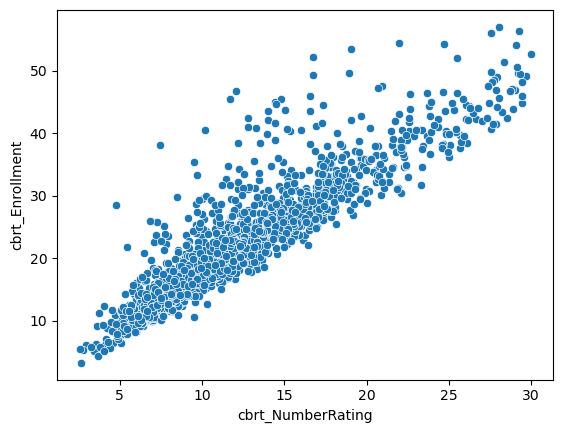

In [26]:

sns.scatterplot(x=df.cbrt_NumberRating, y=df.cbrt_Enrollment)


<Axes: xlabel='cbrt_NumberRating', ylabel='cbrt_Review'>

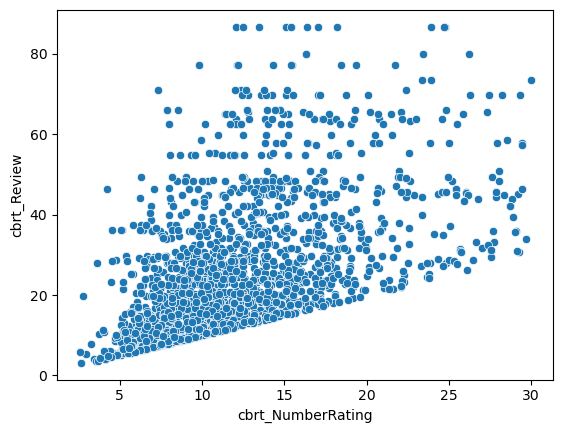

In [27]:
sns.scatterplot(x=df.cbrt_NumberRating, y=df.cbrt_Review)

<Axes: xlabel='cbrt_NumberRating', ylabel='cbrt_Student'>

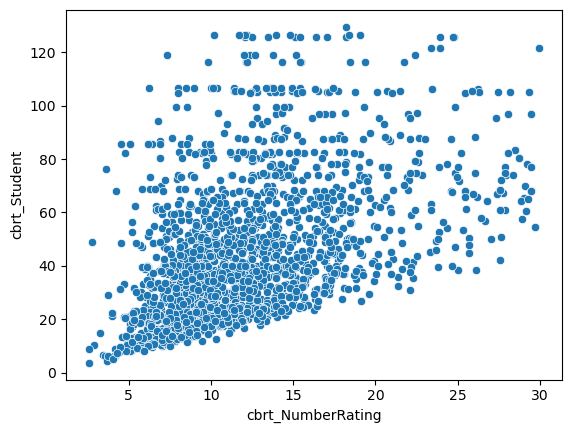

In [28]:
sns.scatterplot(x=df.cbrt_NumberRating, y=df.cbrt_Student)

<Axes: xlabel='cbrt_NumberRating', ylabel='InstRating'>

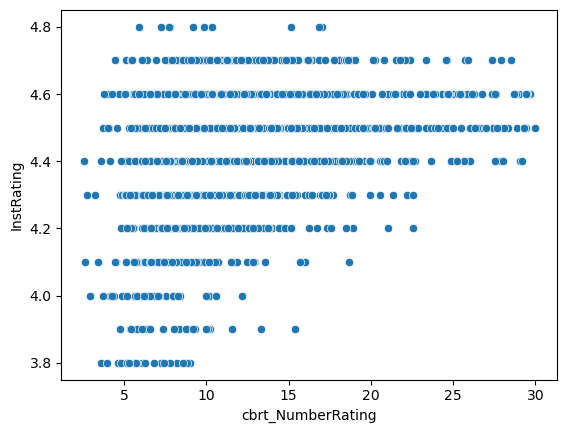

In [29]:
sns.scatterplot(x=df.cbrt_NumberRating, y=df.InstRating)

# E) Feature Observation and Hypothesis
 

In [30]:
df.corr()['cbrt_NumberRating'].abs().sort_values(ascending=False)

cbrt_NumberRating           1.000000
cbrt_Enrollment             0.907249
cbrt_Review                 0.531378
cbrt_Student                0.482139
InstRating                  0.339603
AvgRating                   0.303666
cat_programming             0.118518
cat_it_software             0.066212
cat_lifestyle               0.066125
Lectures                    0.037041
Fee                         0.032888
cat_personal_development    0.025351
Duration                    0.020096
cat_design                  0.017274
cat_marketing               0.017084
LastUpdated                 0.007058
Discount                    0.003391
Name: cbrt_NumberRating, dtype: float64

### Among all the features, "cbrt_Enrollment" exhibits a strong positive correlation of approximately 90% with the target variable.
### This indicates that there is a significant association between the number of enrollments (cbrt_Enrollment) and the target variable (cbrt_NumberRating). When the number of enrollments is high, it is likely that the cbrt_NumberRating is also high. This positive correlation suggests that as the enrollment increases, there is a tendency for the number rating to increase as well.
### Furthermore, the features "cbrt_Student" and "cbrt_Review" also show moderate positive correlations of 48% and 53%, respectively, with the target variable. Although not as strong as the correlation with "cbrt_Enrollment," these two features still have a meaningful relationship with the target.
### On the other hand, the categorical value columns such as "cat_programming," "cat_it_software," "cat_lifestyle," "cat_personal_development," "cat_design," and "cat_marketing" demonstrate weak correlations with the target variable. This suggests that these categorical features have minimal influence on the variation in the target variable

# 4) Feature Selection

In [31]:
# a)
target = df.cbrt_NumberRating
print(df.shape)
df.reset_index(inplace=True, drop=True)

(1844, 17)


In [32]:
df

InstRating  Lectures   Duration  AvgRating  LastUpdated      Fee  \
0            4.5     286.0   9.800000        4.6          3.0  19.9900   
1            4.2      66.0   4.966667        4.2          3.0  16.9900   
2            4.5     251.0  93.150000        4.4          5.0  17.9900   
3            4.7      26.0   2.050000        4.7          3.0  16.9900   
4            4.4      82.0  11.066667        4.4          6.0  16.9900   
...          ...       ...        ...        ...          ...      ...   
1839         4.4      23.0   6.316667        4.6          3.0  17.9900   
1840         4.6     109.0  11.733333        4.6          3.0  21.9900   
1841         4.6      51.0  10.766667        4.6          5.0  28.9900   
1842         4.7      56.0   8.183333        4.7          3.0  15.7125   
1843         4.3      48.0   3.783333        4.6          3.0  18.4875   

      Discount  cbrt_NumberRating  cbrt_Enrollment  cbrt_Student  cbrt_Review  \
0         88.0          27.951020        48.974581     74.041978    44.791629   
1         88.0          11.416535        20.853094     31.853168    17.819177   
2         89.0          19.004616        31.409753     72.232850    36.717597   
3         80.0          16.913051        25.146869     35.740678    24.546490   
4         83.0           8.946181        17.940130     41.425278    25.027703   
...        ...                ...              ...           ...          ...   
1839      49.0          13.491993        24.327682     64.730800    43.108075   
1840      92.0          12.304698        22.029575     31.038108    20.602501   
1841      83.0          11.421648        22.999370     23.682152    11.421648   
1842      32.0          14.857918        23.127209     60.770435    44.324902   
1843      67.0           9.375096        15.877978     25.848727    13.219164   

      cat_design  cat_it_software  cat_lifestyle  cat_marketing  \
0              0                0              0              0   
1              0                0              0              0   
2              0                1              0              0   
3              0                1              0              0   
4              0                0              0              0   
...          ...              ...            ...            ...   
1839           0                0              0              0   
1840           0                0              0              0   
1841           0                0              1              0   
1842           0                0              0              0   
1843           0                1              0              0   

      cat_personal_development  cat_programming  
0                            0                0  
1                            0                1  
2                            0                0  
3                            0                0  
4                            1                0  
...                        ...              ...  
1839                         1                0  
1840                         0                0  
1841                         0                0  
1842                         0                1  
1843                         0                0  

[1844 rows x 17 columns]

# b) Correlation based selection

In [33]:
%run functions/Project1_RKa51928.ipynb


In [34]:
df_corr = select_correlation(df)
df_corr = df_corr.drop(columns='cbrt_NumberRating', axis=1)
df_corr

cbrt_Enrollment  cbrt_Review  cbrt_Student  InstRating  AvgRating  \
0           48.974581    44.791629     74.041978         4.5        4.6   
1           20.853094    17.819177     31.853168         4.2        4.2   
2           31.409753    36.717597     72.232850         4.5        4.4   
3           25.146869    24.546490     35.740678         4.7        4.7   
4           17.940130    25.027703     41.425278         4.4        4.4   
...               ...          ...           ...         ...        ...   
1839        24.327682    43.108075     64.730800         4.4        4.6   
1840        22.029575    20.602501     31.038108         4.6        4.6   
1841        22.999370    11.421648     23.682152         4.6        4.6   
1842        23.127209    44.324902     60.770435         4.7        4.7   
1843        15.877978    13.219164     25.848727         4.3        4.6   

      cat_programming  
0                   0  
1                   1  
2                   0  
3                   0  
4                   0  
...               ...  
1839                0  
1840                0  
1841                0  
1842                1  
1843                0  

[1844 rows x 6 columns]

# c)Variance Threshold

In [35]:
features = df.drop('cbrt_NumberRating', axis=1)
df_vt = select_variance(features, 3)

In [36]:
df_vt

Lectures   Duration      Fee  Discount  cbrt_Enrollment  cbrt_Student  \
0        286.0   9.800000  19.9900      88.0        48.974581     74.041978   
1         66.0   4.966667  16.9900      88.0        20.853094     31.853168   
2        251.0  93.150000  17.9900      89.0        31.409753     72.232850   
3         26.0   2.050000  16.9900      80.0        25.146869     35.740678   
4         82.0  11.066667  16.9900      83.0        17.940130     41.425278   
...        ...        ...      ...       ...              ...           ...   
1839      23.0   6.316667  17.9900      49.0        24.327682     64.730800   
1840     109.0  11.733333  21.9900      92.0        22.029575     31.038108   
1841      51.0  10.766667  28.9900      83.0        22.999370     23.682152   
1842      56.0   8.183333  15.7125      32.0        23.127209     60.770435   
1843      48.0   3.783333  18.4875      67.0        15.877978     25.848727   

      cbrt_Review  
0       44.791629  
1       17.819177  
2       36.717597  
3       24.546490  
4       25.027703  
...           ...  
1839    43.108075  
1840    20.602501  
1841    11.421648  
1842    44.324902  
1843    13.219164  

[1844 rows x 7 columns]

# d) Select K-Best

In [37]:
df_kbest = select_kbest(df, 7)

In [38]:
df_kbest

InstRating  AvgRating  cbrt_Enrollment  cbrt_Student  cbrt_Review  \
0            4.5        4.6        48.974581     74.041978    44.791629   
1            4.2        4.2        20.853094     31.853168    17.819177   
2            4.5        4.4        31.409753     72.232850    36.717597   
3            4.7        4.7        25.146869     35.740678    24.546490   
4            4.4        4.4        17.940130     41.425278    25.027703   
...          ...        ...              ...           ...          ...   
1839         4.4        4.6        24.327682     64.730800    43.108075   
1840         4.6        4.6        22.029575     31.038108    20.602501   
1841         4.6        4.6        22.999370     23.682152    11.421648   
1842         4.7        4.7        23.127209     60.770435    44.324902   
1843         4.3        4.6        15.877978     25.848727    13.219164   

      cat_it_software  cat_programming  
0                   0                0  
1                   0                1  
2                   1                0  
3                   1                0  
4                   0                0  
...               ...              ...  
1839                0                0  
1840                0                0  
1841                0                0  
1842                0                1  
1843                1                0  

[1844 rows x 7 columns]

# 5) Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [39]:
fselection = [df_corr, df_vt, df_kbest]
log_performed = ["Not Performed", "Performed"]

log_transform_result = []
fselection_list = []
ftransform_list = []
r2_list = []
rmse_list = []

for fsel in fselection:
    for lg in log_performed:
        
        if fsel.equals(df_corr):
            fselection_list.append("df_corr")
        elif fsel.equals(df_vt):
            fselection_list.append("df_vt")
        elif fsel.equals(df_kbest):
            fselection_list.append("df_kbest")
            
        if lg == "Performed": 
            fsel = make_log(fsel)   ## Performing log transformation on data 
        
        rs = RobustScaler()
        scaledFeatures = rs.fit_transform(fsel)
        fselScaled = pd.DataFrame(scaledFeatures, columns=fsel.columns)
        
        
                  
        ## performing train test splitting
        
        X_train, X_test, y_train, y_test = train_test_split(fselScaled, target, test_size=0.25, random_state=42)
        
        ## Applying Linear regression
        
        lmodel = LinearRegression()
        lmodel.fit(X_train, y_train)
        target_pred = lmodel.predict(X_test)
        
        ## Calculate performance metrics
        r2 = lmodel.score(X_test, y_test)
        r2_list.append(r2)  ## appending to list
        
        rmse = mean_squared_error(target_pred, y_test)** 0.5;
        rmse_list.append(round(rmse, 3))  ## appending to list
        
        
        log_transform_result.append(lg)
        
        
       

        

# 6. Lasso


In [40]:
alphas = np.linspace(1,0.001, 15)   ### Creating alphas value


In [41]:
rs = RobustScaler()
scaledFeatures = rs.fit_transform(features)
featureScaled = pd.DataFrame(scaledFeatures, columns=features.columns)


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(featureScaled, target, random_state=42, test_size=0.25)

In [43]:
r2Lasso_List = []
rmseLasso_List = []


for a in alphas:
    lasso = Lasso(alpha = a, max_iter=15000)
    lasso.fit(X_train, Y_train)
    Y_pred = lasso.predict(X_test)
    
    r2Lasso_List.append(lasso.score(X_train, y_train))
    rmse = mean_squared_error(Y_test, Y_pred)**0.5;
    
    rmseLasso_List.append(rmse)
    
    
    
    
    

In [44]:
Lasso_df = pd.DataFrame(zip(alphas, rmseLasso_List, r2Lasso_List), columns=["Alphas", "RMSE", "R2"])
Lasso_df

Alphas      RMSE        R2
0   1.000000  2.561866  0.764055
1   0.928643  2.517696  0.772573
2   0.857286  2.476033  0.780460
3   0.785929  2.437006  0.787717
4   0.714571  2.400743  0.794344
5   0.643214  2.367372  0.800340
6   0.571857  2.337017  0.805707
7   0.500500  2.309796  0.810442
8   0.429143  2.285821  0.814548
9   0.357786  2.265196  0.818023
10  0.286429  2.248013  0.820869
11  0.215071  2.234404  0.823115
12  0.143714  2.219252  0.825494
13  0.072357  2.067912  0.844122
14  0.001000  1.921750  0.860338

In [45]:
LeastAlpha = Lasso_df.sort_values(by=['RMSE', 'R2'], ascending=True).head(1)
LeastAlpha

Alphas     RMSE        R2
14   0.001  1.92175  0.860338

# 7) Plot and summary analysis

In [46]:
alp = LeastAlpha.iloc[0,0]
rmseA = LeastAlpha.iloc[0,1] 
r2A = LeastAlpha.iloc[0,2]
print(type(r2A))
fselection_list.append(f"Lasso, alpha = {alp}")
log_transform_result.append("None")
r2_list.append(round(r2A, 3))
rmse_list.append(round(rmseA, 2))

<class 'numpy.float64'>


In [47]:
ResultSummary = pd.DataFrame(zip(fselection_list, log_transform_result, r2_list, rmse_list), columns=["Feature Selection", "Log Transformation",
                                                                                            "R2 Score", "RMSE Score"])

In [48]:
ResultSummary

Feature Selection Log Transformation  R2 Score  RMSE Score
0               df_corr      Not Performed  0.860394       1.923
1               df_corr          Performed  0.824717       2.155
2                 df_vt      Not Performed  0.859774       1.927
3                 df_vt          Performed  0.820336       2.181
4              df_kbest      Not Performed  0.859640       1.928
5              df_kbest          Performed  0.822626       2.167
6  Lasso, alpha = 0.001               None  0.860000       1.920

In [49]:
ResultSummary.sort_values(by=['R2 Score', 'RMSE Score'], ascending=False)

Feature Selection Log Transformation  R2 Score  RMSE Score
0               df_corr      Not Performed  0.860394       1.923
6  Lasso, alpha = 0.001               None  0.860000       1.920
2                 df_vt      Not Performed  0.859774       1.927
4              df_kbest      Not Performed  0.859640       1.928
1               df_corr          Performed  0.824717       2.155
5              df_kbest          Performed  0.822626       2.167
3                 df_vt          Performed  0.820336       2.181

## According to me the best model is df_corr in which no Log transformation is performed.

In [50]:
rs = RobustScaler()
scaledFeatures = rs.fit_transform(df_corr)
dfBestModelScaled = pd.DataFrame(scaledFeatures, columns=df_corr.columns)

## performing train test splitting

X_train, X_test, y_train, y_test = train_test_split(dfBestModelScaled, target, test_size=0.25, random_state=42)

## Applying Linear regression

lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
target_pred = lmodel.predict(X_test)
        

In [51]:
mse =  mean_squared_error(Y_test, target_pred)**0.5
mse

1.9228317850833492

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
ytest = np.array(Y_test)

In [54]:
x = target_pred
y = ytest

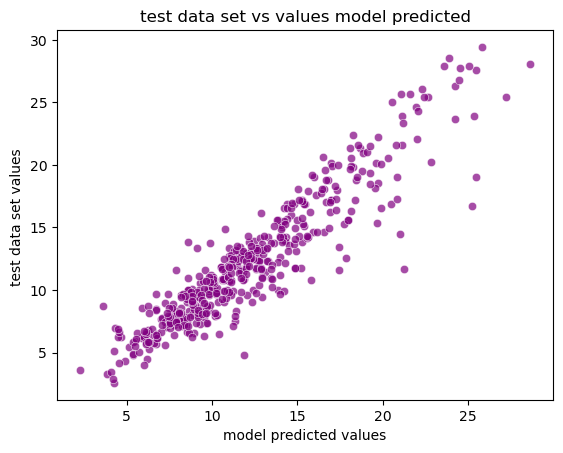

In [55]:
sns.scatterplot(x=x, y=y, color="purple", alpha=0.7, marker="o")
# Add title and labels
plt.title("test data set vs values model predicted")
plt.xlabel("model predicted values")
plt.ylabel("test data set values ")


plt.show()


In [56]:
colName = list(X_train.columns)
coef = lmodel.coef_.transpose()

In [57]:
pd.DataFrame(zip(colName, coef), columns=['feature', 'coeff'])

feature     coeff
0  cbrt_Enrollment  6.049190
1      cbrt_Review  3.461966
2     cbrt_Student -4.007102
3       InstRating -0.241794
4        AvgRating  0.122456
5  cat_programming  0.128497

### Because According to the table it has the best R2 Score 0.860394 and second least rmse as lasso alphas owth alpha 0.001 has the least RMSE score but looking at R2 score i choose df_corr with no logtransformation to be best linear model and the second best T performing model is the Lasso model with alpha = 0.001 and no log transformation. It achieved a slightly lower R2 score of 0.860000 and a slightly lower RMSE score of 1.920 compared to the top-performing model. Lasso regularization helps in feature selection by shrinking the coefficients of less important features to zero, leading to a more sparse and interpretable model.


# 8) Out of Sample Prediction

In [58]:
df.describe(percentiles=[0.25, 0.75])

InstRating     Lectures     Duration    AvgRating  LastUpdated  \
count  1844.000000  1844.000000  1844.000000  1844.000000  1844.000000   
mean      4.427711   105.111171    12.140709     4.419848     3.757050   
std       0.188050    98.992856    13.441538     0.235754     1.296759   
min       3.800000     5.000000     1.000000     2.700000     3.000000   
25%       4.300000    44.000000     4.475000     4.300000     3.000000   
50%       4.500000    74.000000     7.883333     4.500000     3.000000   
75%       4.600000   125.000000    14.416667     4.600000     4.000000   
max       4.800000   699.000000   164.000000     4.900000    12.000000   

               Fee     Discount  cbrt_NumberRating  cbrt_Enrollment  \
count  1844.000000  1844.000000        1844.000000      1844.000000   
mean     23.174124    78.531453          12.189719        22.251830   
std      20.052351    16.505991           5.106436         9.173866   
min      15.712500    30.000000           2.571282         3.301927   
25%      16.990000    74.000000           8.515541        15.509533   
50%      18.487500    86.000000          11.126636        20.817385   
75%      21.990000    89.000000          14.792322        27.128106   
max     199.990000    92.000000          29.966258        56.991894   

       cbrt_Student  cbrt_Review   cat_design  cat_it_software  cat_lifestyle  \
count   1844.000000  1844.000000  1844.000000      1844.000000    1844.000000   
mean      45.510652    26.021107     0.075922         0.234273       0.073753   
std       26.039490    16.359773     0.264945         0.423659       0.261439   
min        3.802952     3.141381     0.000000         0.000000       0.000000   
25%       25.207996    13.737453     0.000000         0.000000       0.000000   
50%       39.493403    21.984148     0.000000         0.000000       0.000000   
75%       60.329584    33.840079     0.000000         0.000000       0.000000   
max      129.445070    86.756354     1.000000         1.000000       1.000000   

       cat_marketing  cat_personal_development  cat_programming  
count    1844.000000               1844.000000      1844.000000  
mean        0.036876                  0.104121         0.288503  
std         0.188509                  0.305501         0.453189  
min         0.000000                  0.000000         0.000000  
25%         0.000000                  0.000000         0.000000  
50%         0.000000                  0.000000         0.000000  
75%         0.000000                  0.000000         1.000000  
max         1.000000                  1.000000         1.000000

In [59]:
df_corr.describe()

cbrt_Enrollment  cbrt_Review  cbrt_Student   InstRating    AvgRating  \
count      1844.000000  1844.000000   1844.000000  1844.000000  1844.000000   
mean         22.251830    26.021107     45.510652     4.427711     4.419848   
std           9.173866    16.359773     26.039490     0.188050     0.235754   
min           3.301927     3.141381      3.802952     3.800000     2.700000   
25%          15.509533    13.737453     25.207996     4.300000     4.300000   
50%          20.817385    21.984148     39.493403     4.500000     4.500000   
75%          27.128106    33.840079     60.329584     4.600000     4.600000   
max          56.991894    86.756354    129.445070     4.800000     4.900000   

       cat_programming  
count      1844.000000  
mean          0.288503  
std           0.453189  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

In [60]:
data = {
    'cbrt_Enrollment': [25.508840, 27.127200],
    'cbrt_Review': [23.744071, 33.840079],
    'cbrt_Student': [45.216648, 60.447862],
    'InstRating': [4.7, 4.6],
    'AvgRating': [4.4, 4.6],
    'cat_programming': [0, 1]
}

df_synthetic = pd.DataFrame(data)
df_synthetic

cbrt_Enrollment  cbrt_Review  cbrt_Student  InstRating  AvgRating  \
0         25.50884    23.744071     45.216648         4.7        4.4   
1         27.12720    33.840079     60.447862         4.6        4.6   

   cat_programming  
0                0  
1                1

In [61]:
rs = RobustScaler()
scaled_features = rs.fit_transform(df_synthetic)
fselScaled1 = pd.DataFrame(scaled_features, columns=df_synthetic.columns)



In [62]:
lmodel.predict(fselScaled1)

array([ 5.3662743 , 17.35987573])

# Thank You!